In [159]:
# Import all necessary libraries.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

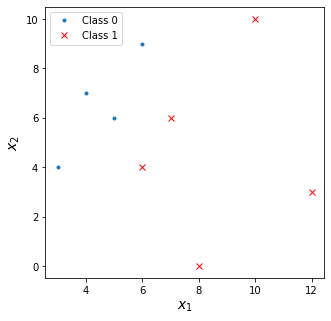

In [160]:
x1 = np.array([4,5,3,6,6,7,8,10,12])
x2 = np.array([7,6,4,9,4,6,0,10,3])
y = np.array([0,0,0,0,1,1,1,1,1])
x1test = 6
x2test = 5

idx0 = np.argwhere(y == 0)
idx1 = np.argwhere(y == 1)

fig = plt.figure(figsize=(5,5))
plt.plot(x1[idx0], x2[idx0], '.', label='Class 0')
plt.plot(x1[idx1], x2[idx1], 'rx', label='Class 1')
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.legend()
plt.savefig('knn_for_two_classes.png', dpi=600)
plt.show()

In [161]:
def k_NN(y, euclidianaList, k):
    copy = euclidianaList.copy()
    k1 = 0
    
    sum0 = 0
    sum1 = 0
    while k1 != k:
        # Get the minimum element from a Numpy array
        minElement = np.amin(copy)
    
        # Get the minimum element's index from a Numpy array
        result = np.where(euclidianaList == minElement)
        # Contribution from nearest neighbors
        for i in range(0,len(result[0])):
            if y[result[0][i]] == 0: sum0 = sum0 + 1/(minElement)
            else: sum1 = sum1 + 1/(minElement)
            
            # Remove the minimum element from a Numpy array
            copy.remove(minElement)
            k1 += 1

    if sum0 >= sum1: y = 0
    else: y = 1

    print('Quando k=' + str(k) + ' a amostra de validação pertence a classe ' + str(y))   
#-------------------------------------------------------------------------------------------------------------------------------
p = 2

euclidianaList = []
plus = 0
for i in range(0,len(x1)):
    euclidiana = (abs(x1[i]-x1test)**p + abs(x2[i]-x2test)**p)**(1/p)
    euclidianaList.append(euclidiana)

print('Classificacao sem sklearn')
y3 = k_NN(y, euclidianaList, 3)
y5 = k_NN(y, euclidianaList, 5)

Classificacao sem sklearn
Quando k=3 a amostra de validação pertence a classe 1
Quando k=5 a amostra de validação pertence a classe 1


In [162]:
print('Classificacao com sklearn')
X = np.c_[x1, x2]
X_test = np.c_[x1test, x2test]
for k in [3, 5]:
    # Create an instance of Neighbours Classifier and fit the data.
    clf = KNeighborsClassifier(k, weights='distance')
    # Train the classifier.
    clf.fit(X, y)
    ytest = clf.predict(X_test)
    print('Quando k=' + str(k) + ' a amostra de validação pertence a classe ' + str(ytest[0])) 

Classificacao com sklearn
Quando k=3 a amostra de validação pertence a classe 1
Quando k=5 a amostra de validação pertence a classe 1
